In [41]:
import pandas as pd
import numpy as np

import scipy.cluster.hierarchy as hcluster
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [10]:
! ls

Advertising.csv  housing.csv  housing.tgz  kobe.csv


In [4]:
cd /home/arseny/Downloads/FE_3/FE 3/data

/home/arseny/Downloads/FE_3/FE 3/data


In [21]:
#kobe_df = pd.read_csv('kobe.csv')
kobe_df = pd.read_csv('kobe.csv')

In [52]:
kobe_df.T.head(80)

,1,2,3,4,5,6,8,9,10,11,...,30685,30687,30688,30689,30690,30691,30692,30694,30695,30696
action_type,Jump Shot,Jump Shot,Jump Shot,Driving Dunk Shot,Jump Shot,Layup Shot,Jump Shot,Running Jump Shot,Jump Shot,Jump Shot,...,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Driving Layup Shot,Jump Shot,Running Jump Shot,Jump Shot,Jump Shot
combined_shot_type,Jump Shot,Jump Shot,Jump Shot,Dunk,Jump Shot,Layup,Jump Shot,Jump Shot,Jump Shot,Jump Shot,...,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Layup,Jump Shot,Jump Shot,Jump Shot,Jump Shot
game_event_id,12,35,43,155,244,251,265,294,309,4,...,249,284,308,326,331,382,397,426,448,471
game_id,20000012,20000012,20000012,20000012,20000012,20000012,20000012,20000012,20000012,20000019,...,49900088,49900088,49900088,49900088,49900088,49900088,49900088,49900088,49900088,49900088
loc_x,-157,-101,138,0,-145,0,-65,-33,-94,121,...,81,40,-126,-12,-113,0,1,-134,31,1
loc_y,0,135,175,0,-11,0,108,125,238,127,...,250,100,61,679,100,0,48,166,267,72
minutes_remaining,10,7,6,6,9,8,6,3,1,11,...,7,3,1,0,11,7,6,3,2,0
period,1,1,1,2,3,3,3,3,3,1,...,3,3,3,3,4,4,4,4,4,4
playoffs,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
season,2000-01,2000-01,2000-01,2000-01,2000-01,2000-01,2000-01,2000-01,2000-01,2000-01,...,1999-00,1999-00,1999-00,1999-00,1999-00,1999-00,1999-00,1999-00,1999-00,1999-00


In [23]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC
5. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной

# 1. Провести анализ данных. 
Много хороших примеров анализа можно посмотреть здесь 
https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels

In [27]:
kobe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 23 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name             25697 non-null object
game_date             25697 non-null object
matchup             

In [17]:
#data['action_type'].unique()
kobe_df.groupby(['action_type'])['shot_id'].count().reset_index().sort_values(by='shot_id', ascending=False)
#combined_shot_type: "Jump Shot", "Layup", "Dunk"

,action_type,shot_id
26,Jump Shot,18880
27,Layup Shot,2567
12,Driving Layup Shot,1978
56,Turnaround Jump Shot,1057
17,Fadeaway Jump Shot,1048
41,Running Jump Shot,926
29,Pullup Jump shot,476
53,Turnaround Fadeaway shot,439
47,Slam Dunk Shot,411
34,Reverse Layup Shot,395


In [ ]:
'''
action_type           30697 non-null object
combined_shot_type    30697 non-null object
season                30697 non-null object
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_name             30697 non-null object
game_date             30697 non-null object
matchup               30697 non-null object
opponent              30697 non-null object

game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
team_id               30697 non-null int64
shot_id               30697 non-null int64   '''

In [ ]:
#поскольку пропущенные значения есть в оцениваемой переменной 'shot_made_flag', отбрасываем такие строки, 
#т.к. вся эта оставшаяся информация не нужна для предсказания

In [25]:
kobe_df.dropna(inplace=True)

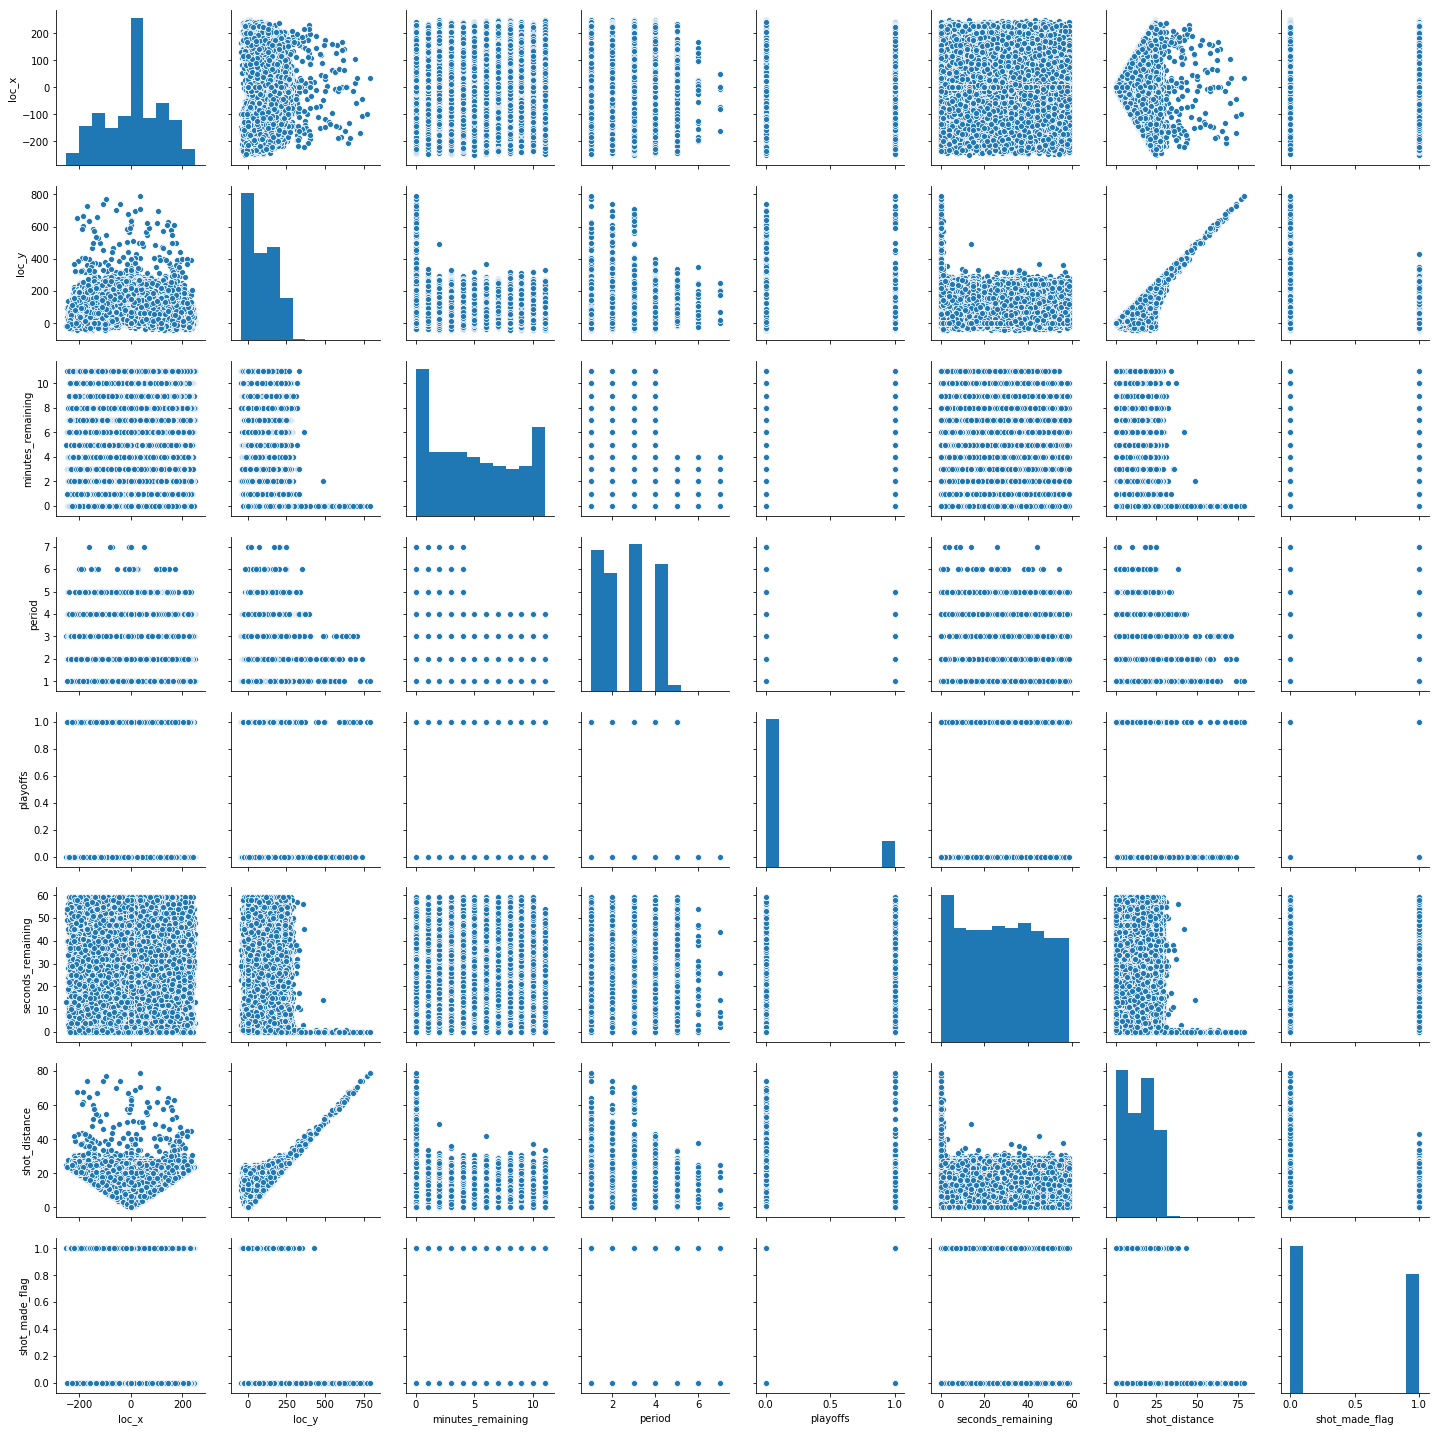

In [29]:
#рисуем числовые переменные 
sns.pairplot(kobe_df, vars=[#'game_event_id', 'game_id', 'lat', 'lon',
                            'loc_x', 'loc_y',  'minutes_remaining', \
                                'period', 'playoffs', 'seconds_remaining', 'shot_distance', \
                                'shot_made_flag', \
                                #'team_id', 'shot_id'\
                            ],
                 kind='scatter', dropna=True)

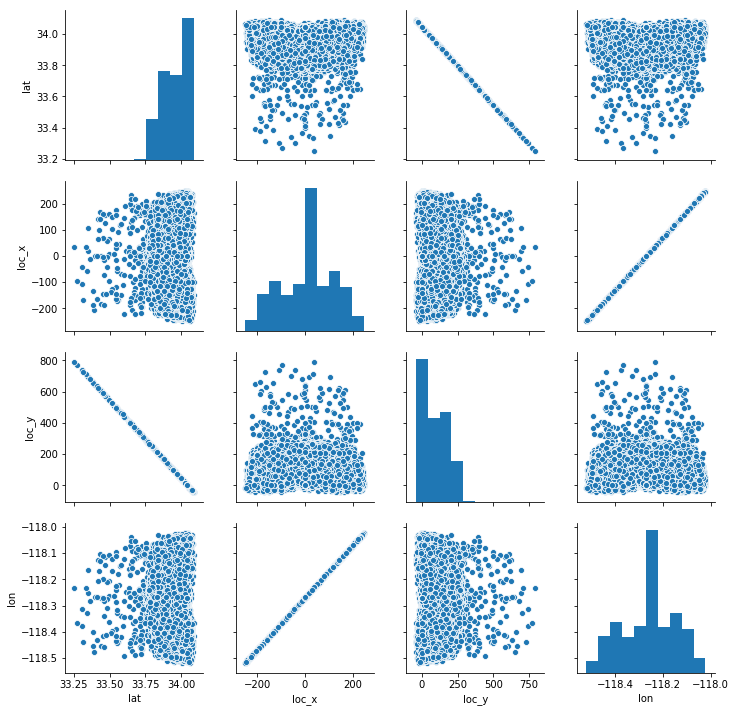

In [8]:
sns.pairplot(kobe_df, vars=['lat', 'loc_x', 'loc_y', 'lon'],
                 kind='scatter',dropna=True)


In [ ]:
#lat, lon можно выбросить. Т.к. они повторяют loc_x, loc_y

In [26]:
kobe_df.drop(columns=['lat', 'lon'], inplace=True)

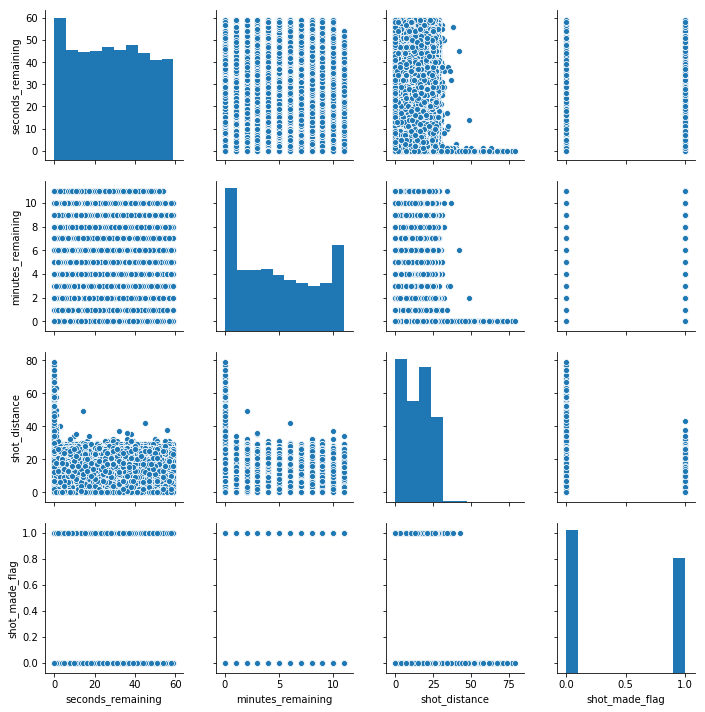

In [31]:
sns.pairplot(kobe_df, vars=['seconds_remaining', 'minutes_remaining', 'shot_distance', 'shot_made_flag'],
                 kind='scatter',dropna=True)


In [ ]:
# в последнеюю минуту и на последних секундах  склонен бросать и бросать издалека

# 2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.

In [ ]:
#пропущеные значения уже отброшены в предыдущем пункте

In [37]:
#kobe_df.drop(columns=['true_seconds_remaining'], inplace=True)
kobe_df['true_seconds_remaining']=kobe_df['seconds_remaining']+kobe_df['minutes_remaining']*60

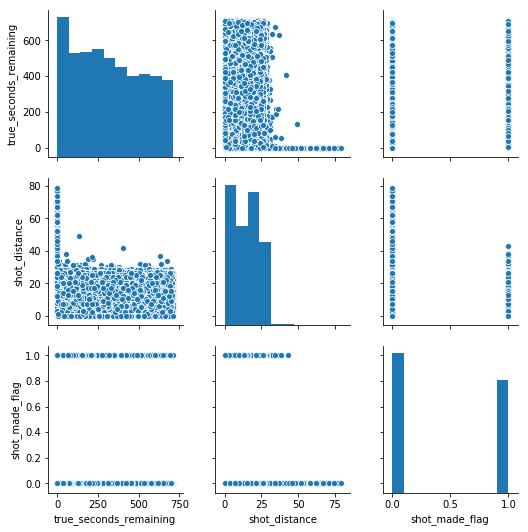

In [38]:
sns.pairplot(kobe_df, vars=['true_seconds_remaining', 'shot_distance', 'shot_made_flag'],
                 kind='scatter',dropna=True)

In [47]:
kobe_df = kobe_df.astype({"true_seconds_remaining": int})

In [58]:
kobe_df['20_s_interv_remain']=(kobe_df['true_seconds_remaining'])//20

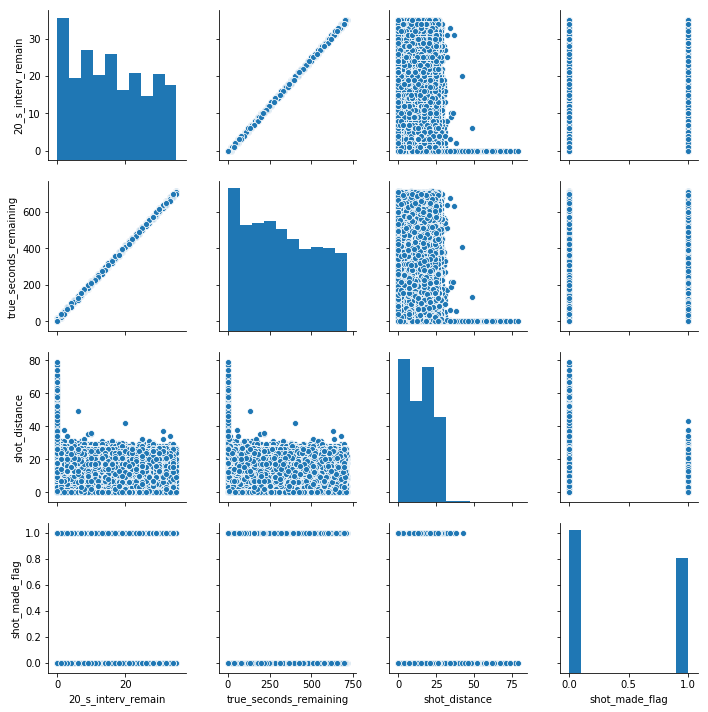

In [59]:
sns.pairplot(kobe_df, vars=['20_s_interv_remain', 'true_seconds_remaining', 'shot_distance', 'shot_made_flag'],
                 kind='scatter',dropna=True)

In [65]:
#accuracy_by_interval=kobe_df.groupby(['20_s_interv_remain'])['shot_made_flag'].mean().reset_index().sort_values(by='20_s_interv_remain', ascending=False)

In [66]:
accuracy_by_interval=kobe_df.groupby('20_s_interv_remain').agg({'shot_made_flag':'mean','shot_id':'count'}).reset_index()

In [79]:
accuracy_by_interval['shot_id']=accuracy_by_interval['shot_id']/accuracy_by_interval['shot_id'].sum()
accuracy_by_interval.rename(index=str, columns={"shot_id": "nmb_of_shots", "shot_made_flag": "accuracy"}, inplace=True)

In [80]:
accuracy_by_interval

,20_s_interv_remain,accuracy,nmb_of_shots
0,0,0.313081,0.054442
1,1,0.406312,0.039460
2,2,0.462275,0.032494
3,3,0.472258,0.030159
4,4,0.419397,0.029692
5,5,0.449728,0.028641
6,6,0.435096,0.032377
7,7,0.480620,0.030120
8,8,0.426908,0.030081
9,9,0.455369,0.030081


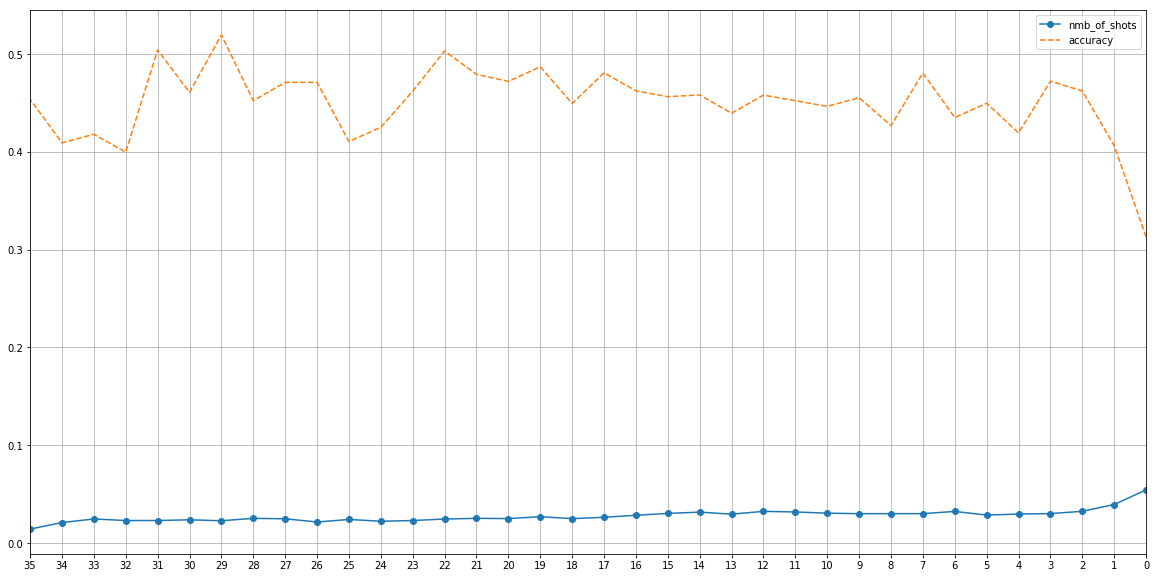

In [86]:
plt.figure(figsize=(20,10))
x=accuracy_by_interval['20_s_interv_remain']
y=accuracy_by_interval['nmb_of_shots']
z=accuracy_by_interval['accuracy']

#accuracy_by_interval.plot('20_s_interv_remain', 'nmb_of_shots');
#accuracy_by_interval.plot('accuracy');

plt.plot(x, y, marker='o')
plt.plot(z, linestyle='dashed')
# инвертирование оси Х
plt.xlim(35, 0)

plt.grid(True)

plt.legend()

In [ ]:
# при бросках в последние 40 секунд каждой четверти точность снижаетеся

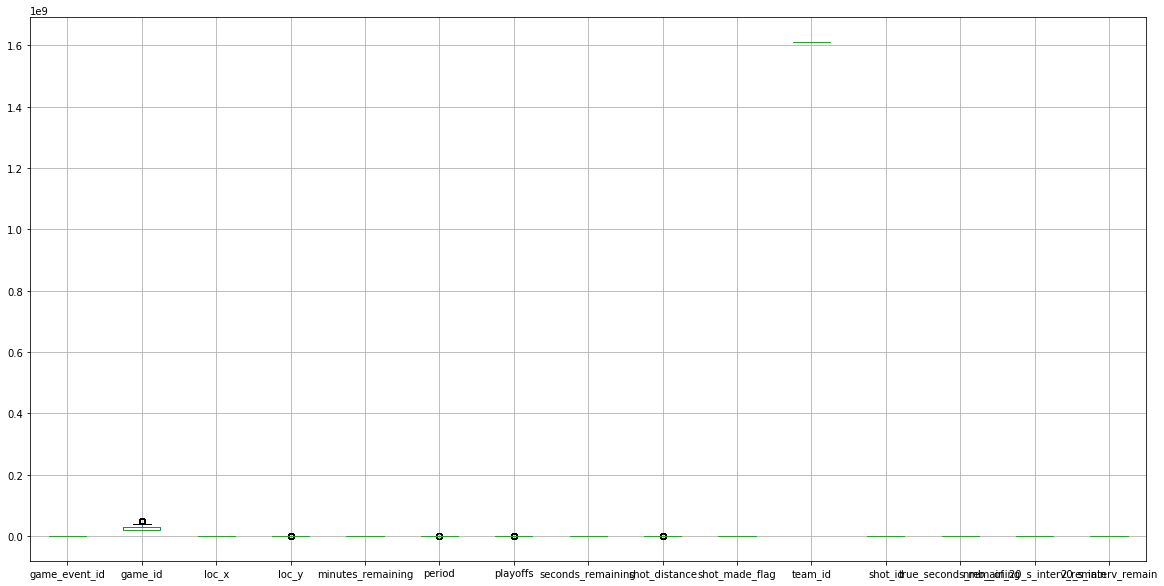

In [88]:
plt.figure(figsize=(20,10))
kobe_df.boxplot()

In [91]:
plt.Axes.boxplot(kobe_df) 

TypeError: boxplot() missing 1 required positional argument: 'x'

In [97]:
import scipy.stats.stats as stats
import re
import traceback
import string

In [98]:
def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [99]:
final_iv, IV = data_vars(kobe_df , kobe_df.shot_made_flag)

NameError: name 'char_bin' is not defined

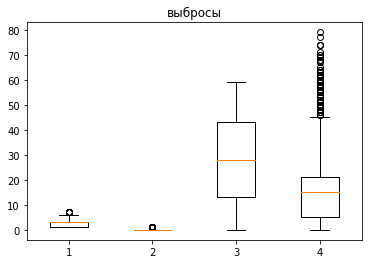

In [93]:
data = [kobe_df['period'], kobe_df['playoffs'], kobe_df['seconds_remaining'], kobe_df['shot_distance'] ]
#'loc_x', 'loc_y',  'minutes_remaining', \
#                                'period', 'playoffs', 'seconds_remaining', 'shot_distance', \
#                                'shot_made_flag'
fig7, ax7 = plt.subplots()
ax7.set_title('выбросы')
ax7.boxplot(data)

plt.show()

# 3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

# 4*. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC

# 5*. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной